# Training a Binary Classifier

In [1]:
import numpy as np 
from sklearn .datasets import fetch_openml 

In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys() # Aplicando el método keys() para obtener una lista de los atributos del dataset 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist.data, mnist.target 

In [5]:
type(X) 

pandas.core.frame.DataFrame

In [6]:
X=X.values 

In [ ]:
type(X) 

In [10]:
X.shape 

(70000, 784)

In [11]:
import matplotlib.pyplot as plt 

In [12]:
some_digit=X[0,:] # tomamos la primera instancia de los datos 

In [13]:
len(some_digit)  # evaluamos el tamaño de la primera instancia 

784

In [14]:
some_digit_image=some_digit.reshape(28,28) # convertimos la primera instancia en una matriz cuadrada 

In [15]:
some_digit_image[0,:]  

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

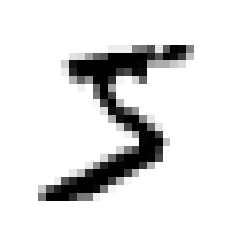

In [16]:
plt.imshow(some_digit_image,cmap='binary')   
plt.axis('off') 
plt.show() 

In [17]:
y[0]

'5'

In [18]:
y=y.astype(np.int)    

In [19]:
y[0] 

5

In [20]:
X_train,X_test,y_train,y_test=X[:60000,:],X[60000:,:],y[:60000],y[60000:] 

Simplifiquemos el problema por ahora e intentemos identificar solo un dígito, por ejemplo, el número 5.

Este “detector del 5” será un ejemplo de clasificador binario, capaz de distinguir entre solo dos clases, $5$ y no $5$.

Creemos los vectores de destino para esta tarea de clasificación:

In [21]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits

In [22]:
y_train_5 

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

In [23]:
y_test_5 = (y_test == 5)

In [24]:
y_test_5 

60000    False
60001    False
60002    False
60003    False
60004    False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 10000, dtype: bool

Ahora elija un clasificador y entrenelo.

Un buen lugar para comenzar es con un clasificador estocástico de gradiente descendente (SGD), utilizando Scikit-Learn's Clase `SGDClassifier`.

Este clasificador tiene la ventaja de poder manejar conjuntos de datos muy grandes de manera eficiente.

Esto se debe en parte a que el SGD se ocupa de las instancias de entrenamiento de forma independiente, una a la vez (lo que también hace que SGD sea muy adecuado para el aprendizaje en línea), como veremos más adelante.

Vamos a crear un "SGDClassifier" y entrenarlo en todo el conjunto de entrenamiento:

In [25]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)